# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

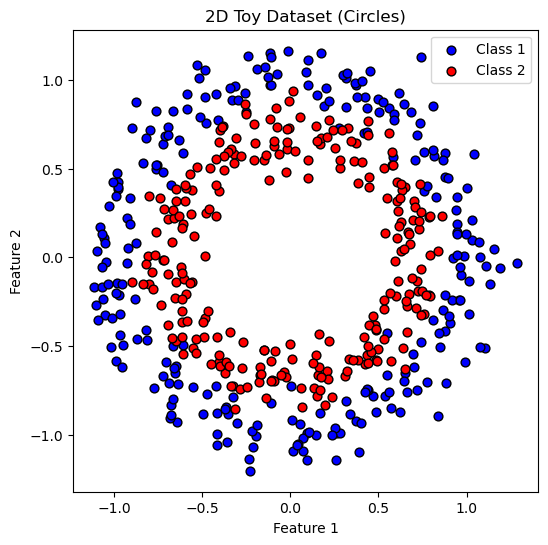

In [2]:
X, y = make_circles(n_samples=500, noise=0.1, factor=0.7, random_state=21)

plt.figure(figsize=(6,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 1', edgecolors='k', s=40)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 2', edgecolors='k', s=40)
plt.title("2D Toy Dataset (Circles)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Q2

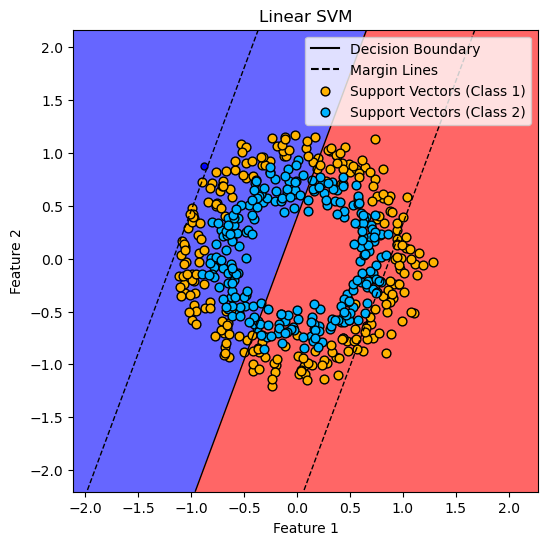

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       250
           1       0.51      0.57      0.54       250

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500

Accuracy: 0.508
Margin size: 1.918
Number of misclassifications: 246 out of 500

Obviously, linear SVM does not work well for this dataset as it is circular, meaning, not only it is not linearly separable, but also the accuracy will be low no matter where or in which direction the decision boundary is, due to symmetry.


In [3]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
                   
Z_linear = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

redish = tuple(c for c in (1,0.4,0.4))
bluish = tuple(c for c in (0.4,0.4,1))
redblue = ListedColormap([bluish, redish])

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z_linear, cmap=redblue)
Z_linear = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_linear, levels=[-1,0,1], colors='black', linewidths=1, linestyles=['--','-','--'])
plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolors='k', s=25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolors='k', s=25)
plt.scatter(linear_svm.support_vectors_[y[linear_svm.support_] == 0, 0], linear_svm.support_vectors_[y[linear_svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1,0.7,0)), edgecolors='k', label='Support Vectors (Class 1)')
plt.scatter(linear_svm.support_vectors_[y[linear_svm.support_] == 1, 0], linear_svm.support_vectors_[y[linear_svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0,0.7,1)), edgecolors='k', label='Support Vectors (Class 2)')
plt.title('Linear SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(classification_report(y, linear_svm.predict(X)))
print(f"Accuracy: {accuracy_score(y, linear_svm.predict(X)):.3f}")
print(f"Margin size: {2 / np.linalg.norm(linear_svm.coef_[0]):.3f}")
print(f"Number of misclassifications: {np.sum(linear_svm.predict(X) != y)} out of {len(y)}")
print(f"\nObviously, linear SVM does not work well for this dataset as it is circular, meaning, not only it is not linearly separable, but also the accuracy will be low no matter where or in which direction the decision boundary is, due to symmetry.")

# Q3

## Choosing kernel

Kernel: linear
Accuracy: 0.508
Number of misclassifications: 246 out of 500

Kernel: poly
Accuracy: 0.674
Number of misclassifications: 163 out of 500

Kernel: rbf
Accuracy: 0.954
Number of misclassifications: 23 out of 500

Kernel: sigmoid
Accuracy: 0.496
Number of misclassifications: 252 out of 500



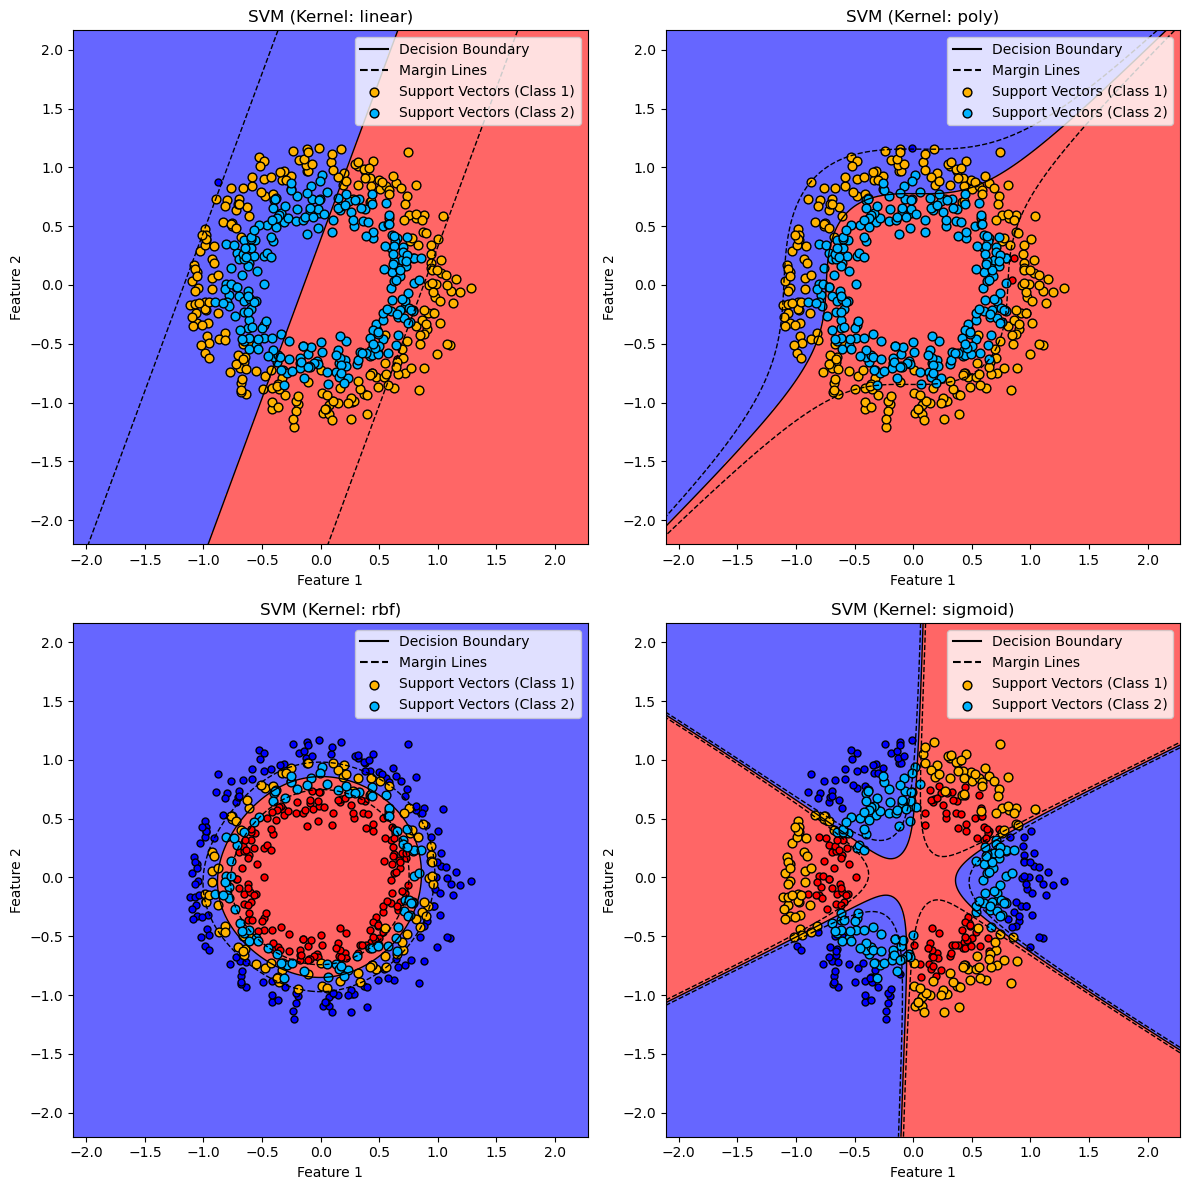

It is very apperant that the RBF kernel is the best one for this dataset since it yields much higher accuracy, comparatively.


In [4]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(12, 12))
for i, kernel in enumerate(kernels, 1):
    svm = SVC(kernel=kernel)
    svm.fit(X, y)

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=redblue)
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linewidths=1, linestyles=['--', '-', '--'])
    plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
    plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', edgecolors='k', s=25)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', edgecolors='k', s=25)
    plt.scatter(svm.support_vectors_[y[svm.support_] == 0, 0], svm.support_vectors_[y[svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1, 0.7, 0)), edgecolors='k', label='Support Vectors (Class 1)')
    plt.scatter(svm.support_vectors_[y[svm.support_] == 1, 0], svm.support_vectors_[y[svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0, 0.7, 1)), edgecolors='k', label='Support Vectors (Class 2)')
    plt.title(f'SVM (Kernel: {kernel})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y, svm.predict(X)):.3f}")
    print(f"Number of misclassifications: {np.sum(svm.predict(X) != y)} out of {len(y)}\n")

plt.tight_layout()
plt.show()
print(f"It is very apperant that the RBF kernel is the best one for this dataset since it yields much higher accuracy, comparatively.")

## Decision surface 3D plot

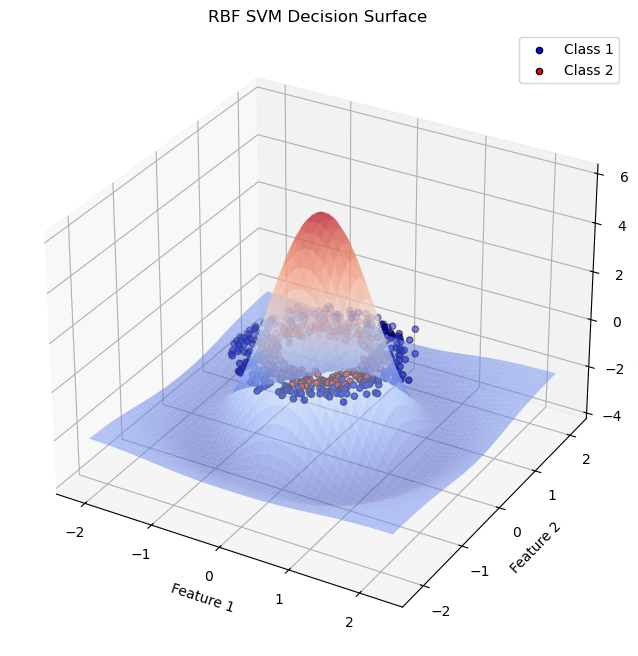

Accuracy: 0.954
Number of misclassifications: 23 out of 500


In [5]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_rbf = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.5)
ax.scatter(X[y==0, 0], X[y==0, 1], np.zeros_like(X[y==0, 0]), color='blue', label='Class 1', edgecolors='k', s=20)
ax.scatter(X[y==1, 0], X[y==1, 1], np.zeros_like(X[y==1, 0]), color='red', label='Class 2', edgecolors='k', s=20)
ax.set_title(f'RBF SVM Decision Surface')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function Value')
ax.legend()
plt.show()

print(f"Accuracy: {accuracy_score(y, rbf_svm.predict(X)):.3f}")
print(f"Number of misclassifications: {np.sum(rbf_svm.predict(X) != y)} out of {len(y)}")

# Q4

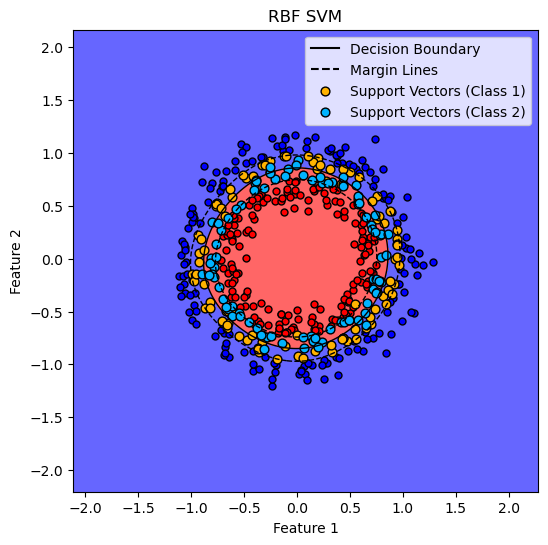

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       250
           1       0.95      0.96      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Accuracy: 0.954
Number of misclassifications: 23 out of 500


In [6]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z_rbf = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z_rbf, cmap=redblue)
Z_rbf = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_rbf, levels=[-1,0,1], colors='black', linewidths=1, linestyles=['--','-','--'])
plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolors='k', s=25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolors='k', s=25)
plt.scatter(rbf_svm.support_vectors_[y[rbf_svm.support_] == 0, 0], rbf_svm.support_vectors_[y[rbf_svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1,0.7,0)), edgecolors='k', label='Support Vectors (Class 1)')
plt.scatter(rbf_svm.support_vectors_[y[rbf_svm.support_] == 1, 0], rbf_svm.support_vectors_[y[rbf_svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0,0.7,1)), edgecolors='k', label='Support Vectors (Class 2)')
plt.title(f'RBF SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(classification_report(y, rbf_svm.predict(X)))
print(f"Accuracy: {accuracy_score(y, rbf_svm.predict(X)):.3f}")
print(f"Number of misclassifications: {np.sum(rbf_svm.predict(X) != y)} out of {len(y)}")

# Alternative dataset

## Q1

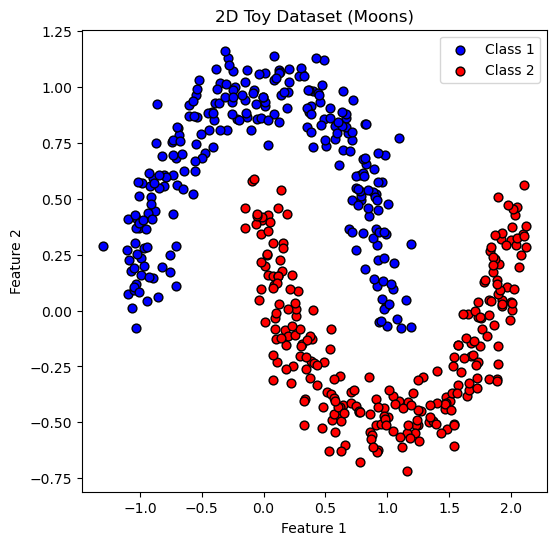

In [7]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=21)

plt.figure(figsize=(6,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 1', edgecolors='k', s=40)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 2', edgecolors='k', s=40)
plt.title("2D Toy Dataset (Moons)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Q2

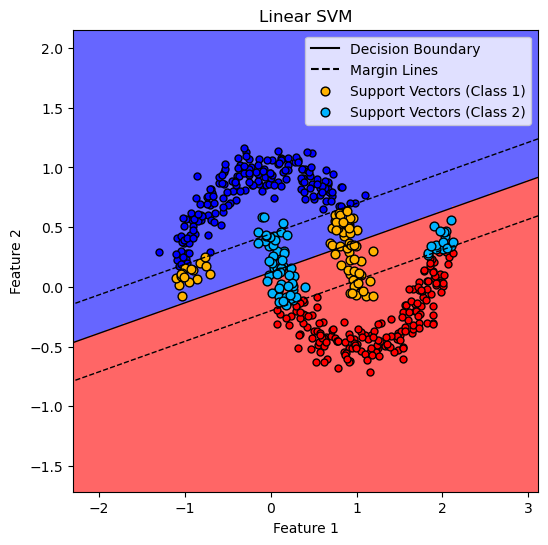

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       250
           1       0.89      0.88      0.89       250

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Accuracy: 0.888
Margin size: 0.625
Number of misclassifications: 56 out of 500

This dataset, while still not linearly seperable, does work better with linear SVM compared to circles. But it is obvious that it can be improved by the usage of non-linear SVMs.


In [8]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
                   
Z_linear = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

redish = tuple(c for c in (1,0.4,0.4))
bluish = tuple(c for c in (0.4,0.4,1))
redblue = ListedColormap([bluish, redish])

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z_linear, cmap=redblue)
Z_linear = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_linear, levels=[-1,0,1], colors='black', linewidths=1, linestyles=['--','-','--'])
plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolors='k', s=25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolors='k', s=25)
plt.scatter(linear_svm.support_vectors_[y[linear_svm.support_] == 0, 0], linear_svm.support_vectors_[y[linear_svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1,0.7,0)), edgecolors='k', label='Support Vectors (Class 1)')
plt.scatter(linear_svm.support_vectors_[y[linear_svm.support_] == 1, 0], linear_svm.support_vectors_[y[linear_svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0,0.7,1)), edgecolors='k', label='Support Vectors (Class 2)')
plt.title('Linear SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(classification_report(y, linear_svm.predict(X)))
print(f"Accuracy: {accuracy_score(y, linear_svm.predict(X)):.3f}")
print(f"Margin size: {2 / np.linalg.norm(linear_svm.coef_[0]):.3f}")
print(f"Number of misclassifications: {np.sum(linear_svm.predict(X) != y)} out of {len(y)}")
print(f"\nThis dataset, while still not linearly seperable, does work better with linear SVM compared to circles. But it is obvious that it can be improved by the usage of non-linear SVMs.")

## Q3

### Choosing kernel

Kernel: linear
Accuracy: 0.888
Number of misclassifications: 56 out of 500

Kernel: poly
Accuracy: 0.934
Number of misclassifications: 33 out of 500

Kernel: rbf
Accuracy: 1.000
Number of misclassifications: 0 out of 500

Kernel: sigmoid
Accuracy: 0.648
Number of misclassifications: 176 out of 500



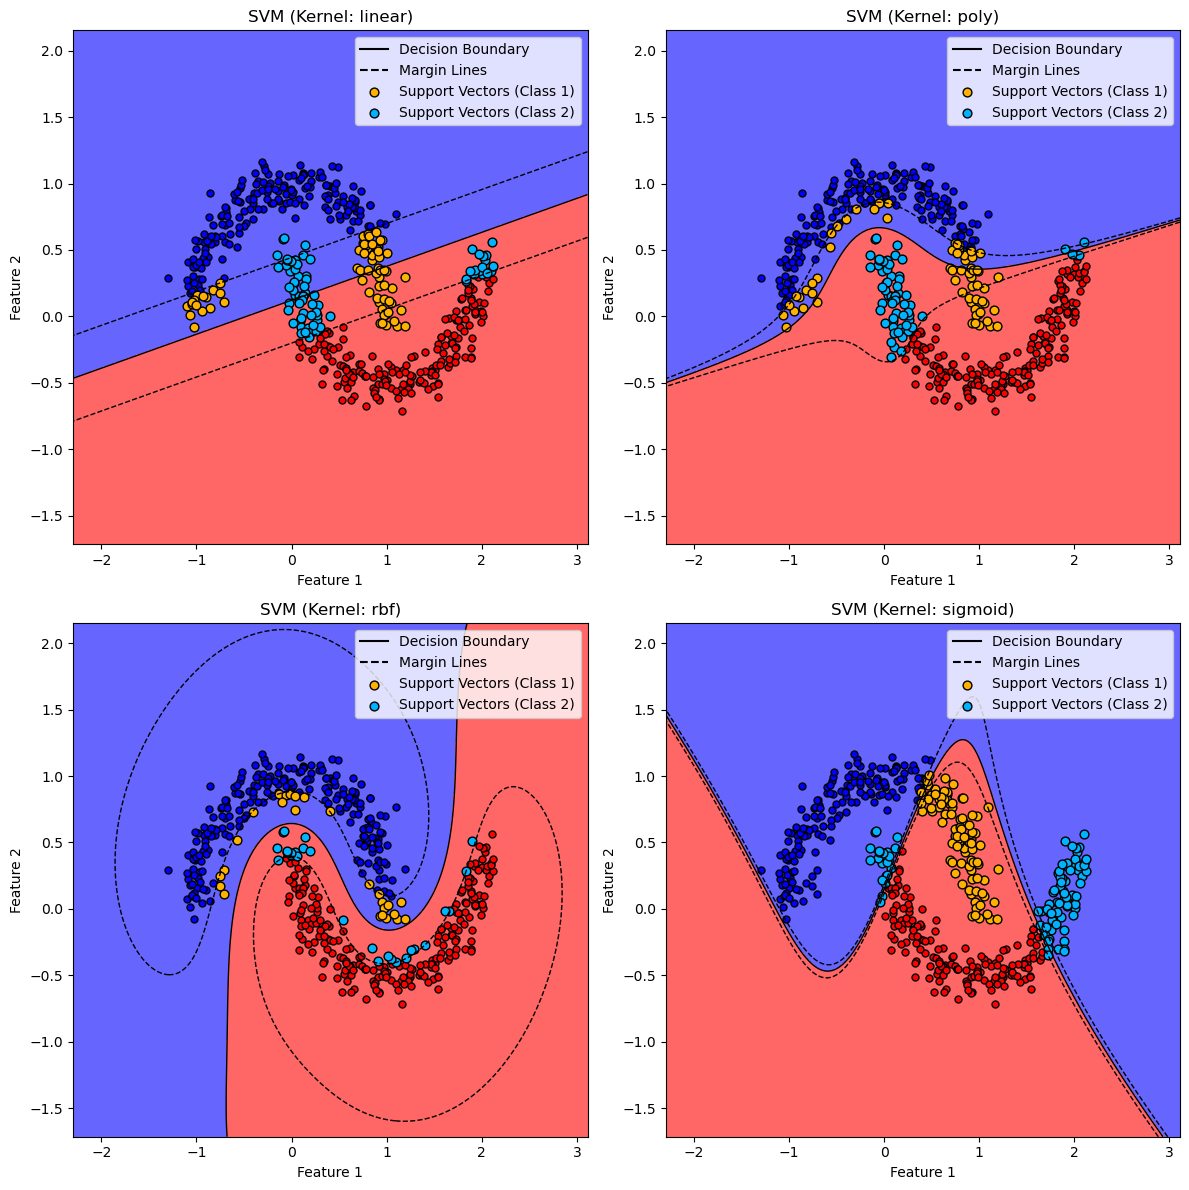

RBF is yet again the best option, but this time the other kernels are viable too, unlike for the previous dataset


In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(12, 12))
for i, kernel in enumerate(kernels, 1):
    svm = SVC(kernel=kernel)
    svm.fit(X, y)

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=redblue)
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linewidths=1, linestyles=['--', '-', '--'])
    plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
    plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', edgecolors='k', s=25)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', edgecolors='k', s=25)
    plt.scatter(svm.support_vectors_[y[svm.support_] == 0, 0], svm.support_vectors_[y[svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1, 0.7, 0)), edgecolors='k', label='Support Vectors (Class 1)')
    plt.scatter(svm.support_vectors_[y[svm.support_] == 1, 0], svm.support_vectors_[y[svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0, 0.7, 1)), edgecolors='k', label='Support Vectors (Class 2)')
    plt.title(f'SVM (Kernel: {kernel})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y, svm.predict(X)):.3f}")
    print(f"Number of misclassifications: {np.sum(svm.predict(X) != y)} out of {len(y)}\n")

plt.tight_layout()
plt.show()
print(f"RBF is yet again the best option, but this time the other kernels are viable too, unlike for the previous dataset")

### Decision surface 3D plot

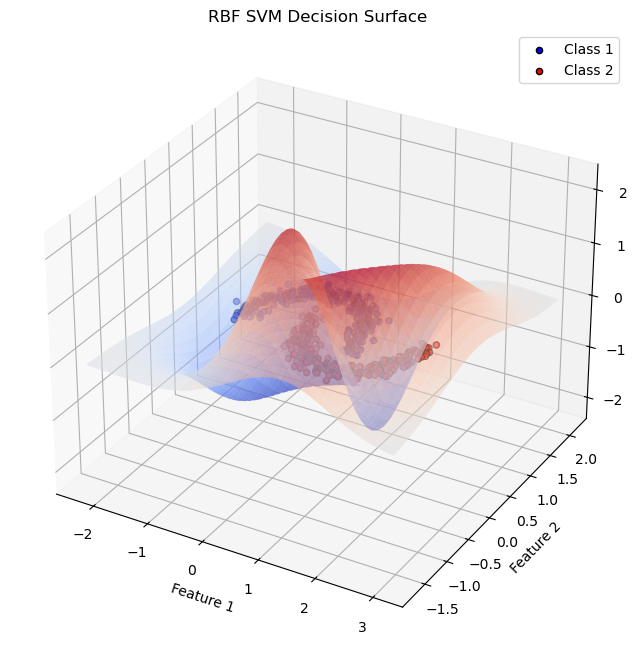

Accuracy: 1.000
Number of misclassifications: 0 out of 500


In [10]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_rbf = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.5)
ax.scatter(X[y==0, 0], X[y==0, 1], np.zeros_like(X[y==0, 0]), color='blue', label='Class 1', edgecolors='k', s=20)
ax.scatter(X[y==1, 0], X[y==1, 1], np.zeros_like(X[y==1, 0]), color='red', label='Class 2', edgecolors='k', s=20)
ax.set_title(f'RBF SVM Decision Surface')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function Value')
ax.legend()
plt.show()

print(f"Accuracy: {accuracy_score(y, rbf_svm.predict(X)):.3f}")
print(f"Number of misclassifications: {np.sum(rbf_svm.predict(X) != y)} out of {len(y)}")

## Q4

<Figure size 1200x1800 with 0 Axes>

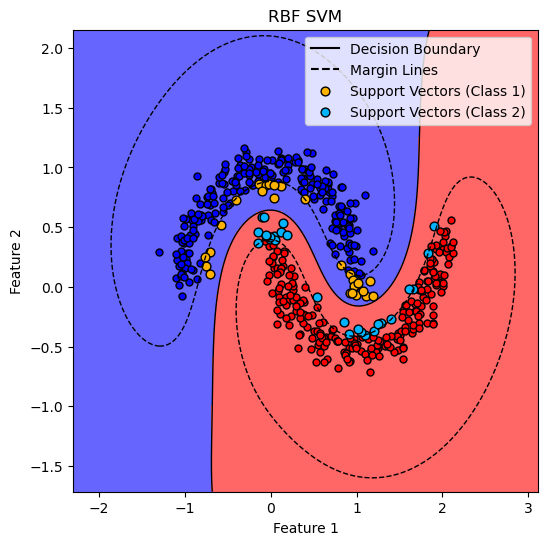

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy: 1.000
Number of misclassifications: 0 out of 500


In [11]:
plt.figure(figsize=(12, 18))

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z_rbf = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z_rbf, cmap=redblue)
Z_rbf = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_rbf, levels=[-1,0,1], colors='black', linewidths=1, linestyles=['--','-','--'])
plt.plot([], [], color='black', linestyle='-', label='Decision Boundary')
plt.plot([], [], color='black', linestyle='--', label='Margin Lines')
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolors='k', s=25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolors='k', s=25)
plt.scatter(rbf_svm.support_vectors_[y[rbf_svm.support_] == 0, 0], rbf_svm.support_vectors_[y[rbf_svm.support_] == 0, 1], s=40, facecolors=tuple(c for c in (1,0.7,0)), edgecolors='k', label='Support Vectors (Class 1)')
plt.scatter(rbf_svm.support_vectors_[y[rbf_svm.support_] == 1, 0], rbf_svm.support_vectors_[y[rbf_svm.support_] == 1, 1], s=40, facecolors=tuple(c for c in (0,0.7,1)), edgecolors='k', label='Support Vectors (Class 2)')
plt.title(f'RBF SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(classification_report(y, rbf_svm.predict(X)))
print(f"Accuracy: {accuracy_score(y, rbf_svm.predict(X)):.3f}")
print(f"Number of misclassifications: {np.sum(rbf_svm.predict(X) != y)} out of {len(y)}")